In [73]:
#!/usr/bin/env python

'''
Simple "Square Detector" program.
Loads several images sequentially and tries to find squares in each image.
'''

# Python 2/3 compatibility
from __future__ import print_function
import sys
PY3 = sys.version_info[0] == 3

if PY3:
    xrange = range

import numpy as np
import cv2 as cv


def angle_cos(p0, p1, p2):
    d1, d2 = (p0-p1).astype('float'), (p2-p1).astype('float')
    return abs( np.dot(d1, d2) / np.sqrt( np.dot(d1, d1)*np.dot(d2, d2) ) )

def find_squares(img):
    img = cv.GaussianBlur(img, (5, 5), 0)
    display(Image.fromarray(img))
    squares = []
    for gray in cv.split(img):
        for thrs in xrange(0, 255, 26):
            print(thrs)
            _retval, bin = cv.threshold(gray, thrs, 255, cv.THRESH_BINARY)
            '''
            if thrs == 0:
                bin = cv.Canny(gray, 0, 50, apertureSize=5)
                bin = cv.dilate(bin, None)
                display(Image.fromarray(bin))
               
                

            else:
            '''
               # _retval, threshold = cv2.threshold(gray,100,255,cv2.THRESH_BINARY_INV)
               
           
            contours, _hierarchy = cv2.findContours(bin,cv2.RETR_LIST,cv2.CHAIN_APPROX_NONE)
          #  contours, _hierarchy = cv.findContours(bin, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)
            for cnt in contours:
                cnt_len = cv.arcLength(cnt, True)
                cnt = cv.approxPolyDP(cnt, 0.02*cnt_len, True)
                #
                if len(cnt) == 4 and cv.contourArea(cnt) > 1000 and  cv.contourArea(cnt) < 5000 and cv.isContourConvex(cnt):
                    cnt = cnt.reshape(-1, 2)
                    max_cos = np.max([angle_cos( cnt[i], cnt[(i+1) % 4], cnt[(i+2) % 4] ) for i in xrange(4)])
                    if max_cos < 0.1:
                        squares.append(cnt)
    return squares



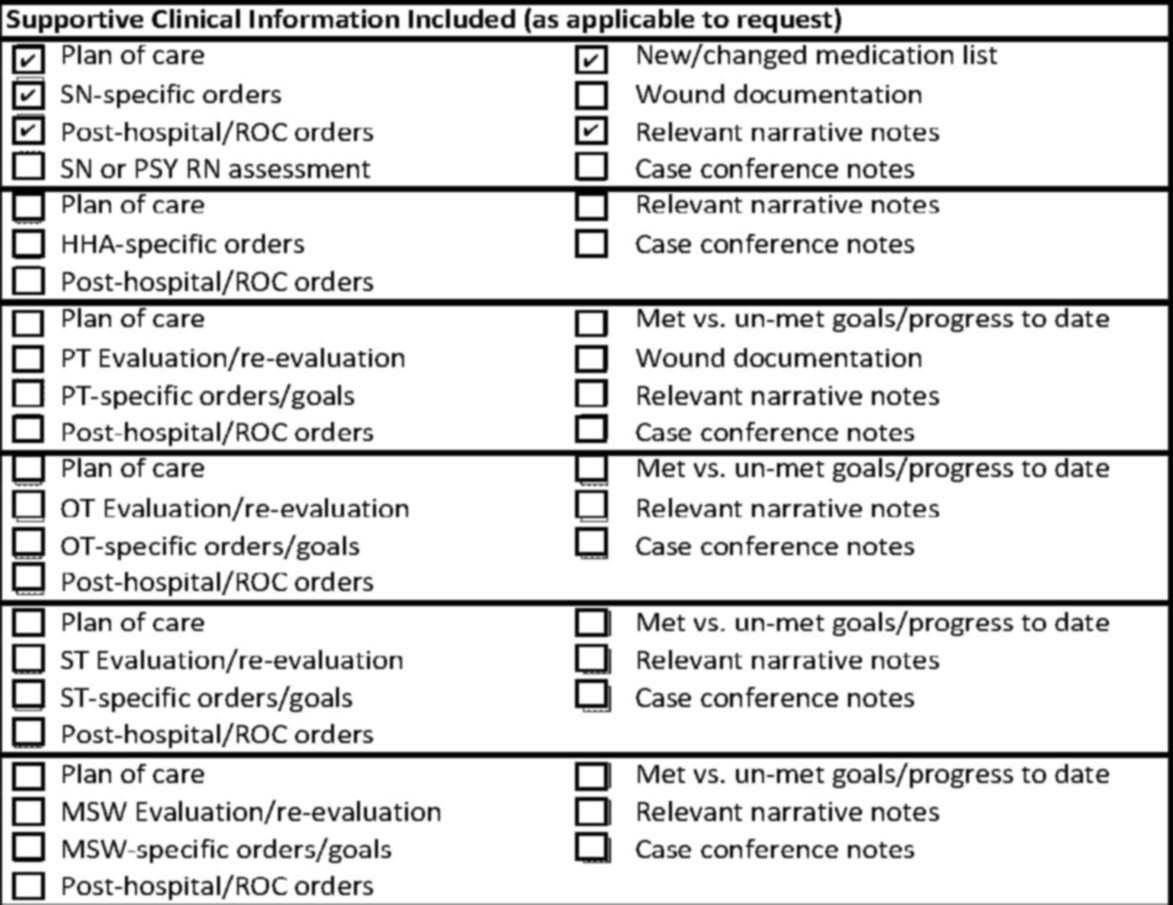

0
26
52
78
104
130
156
182
208
234
0
26
52
78
104
130
156
182
208
234
0
26
52
78
104
130
156
182
208
234


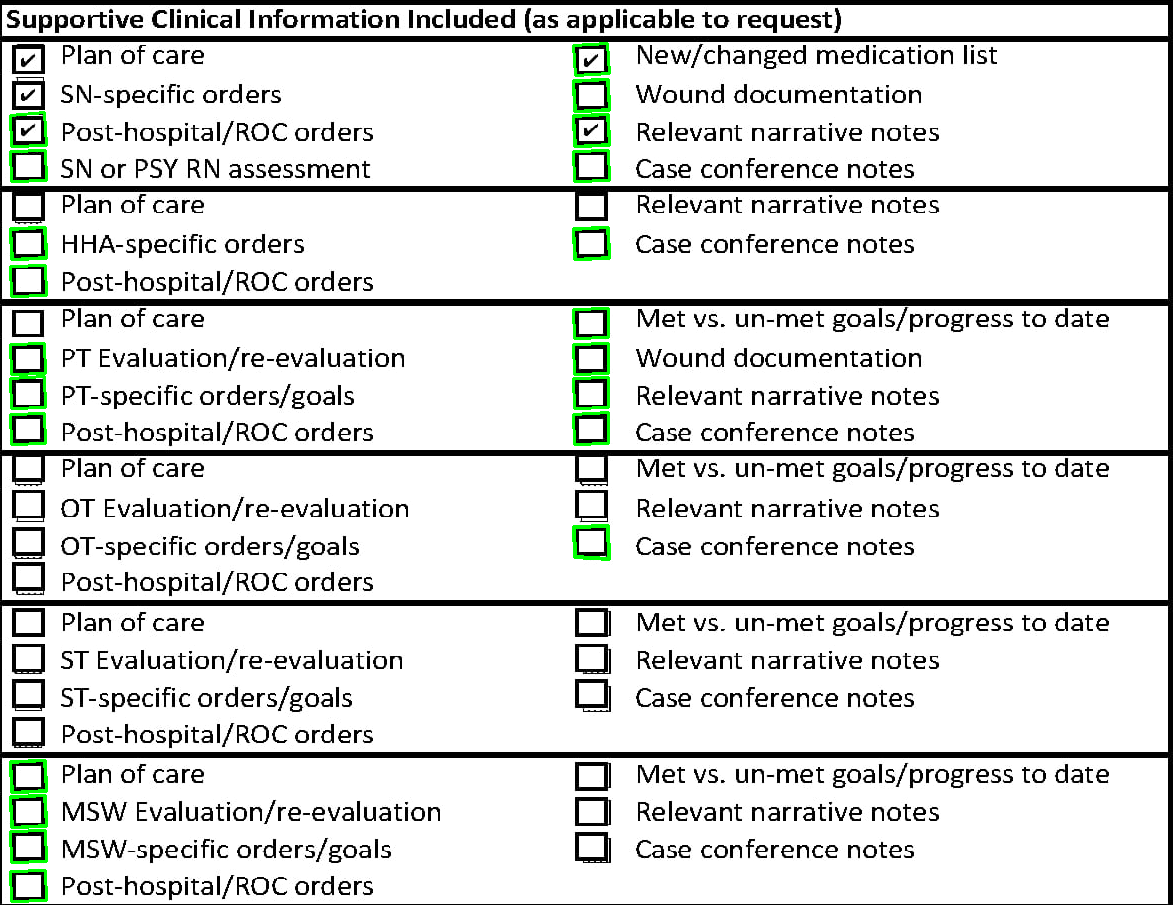

In [74]:
import cv2
import matplotlib.pyplot as plt
from PIL import Image 
from IPython.display import display

img = cv2.imread(r'/mnt/c/Users/yamshee.fatima/Downloads/image/sample1-a.jpg')
#img = cv2.imread(r'/mnt/c/Users/yamshee.fatima/Downloads/image/sample3-a.png')
#img = cv2.imread(r'/mnt/d/checkboxes.jpg')
squares = find_squares(img)
cv2.drawContours( img, squares, -1, (0, 255, 0), 2 )
display(Image.fromarray(img))

3221421
(917, 1171, 3)


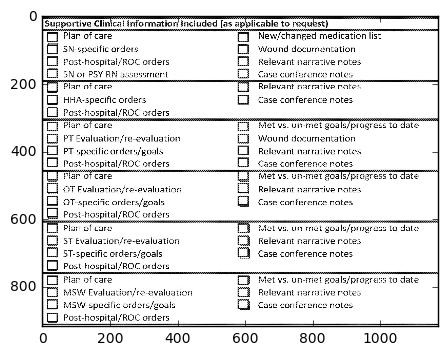

[[[ 14 878]]

 [[ 14 905]]

 [[ 46 905]]

 [[ 46 878]]]
black Count:  49
ratio_black:  0.2560083594566353


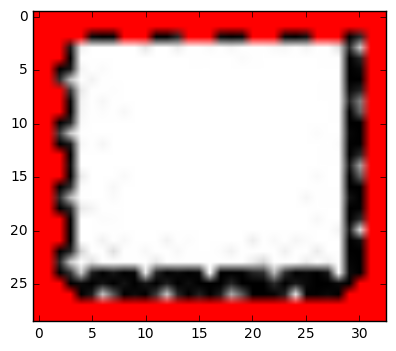

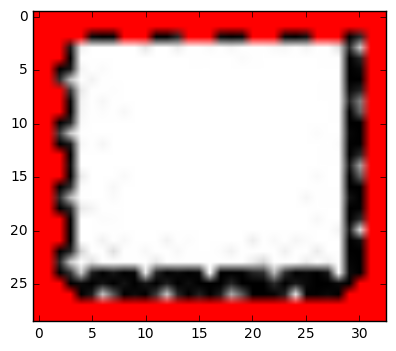

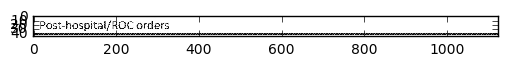

[[[ 17 881]]

 [[ 42 880]]

 [[ 43 902]]

 [[ 18 903]]

 [[ 16 901]]]
black Count:  0
ratio_black:  0.23313492063492064


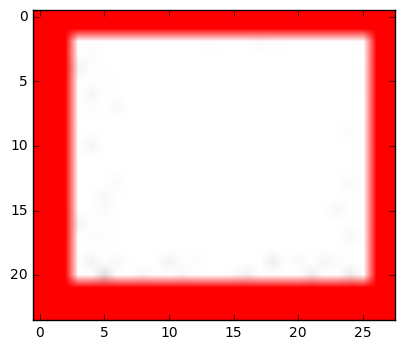

[[[577 838]]

 [[577 866]]

 [[581 865]]

 [[585 868]]

 [[612 868]]

 [[612 845]]

 [[607 841]]

 [[609 838]]]
black Count:  69
ratio_black:  0.2753882915173238


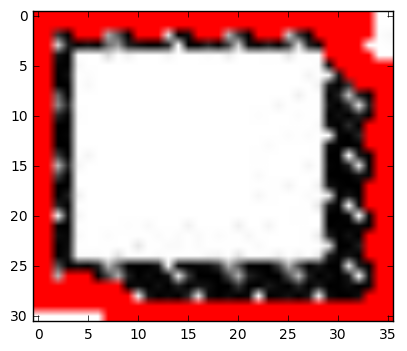

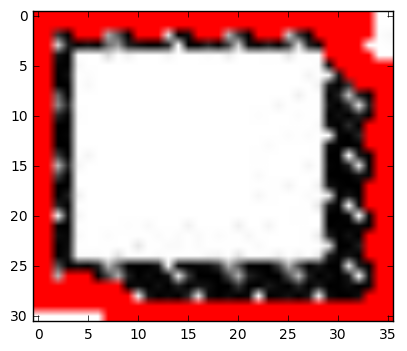

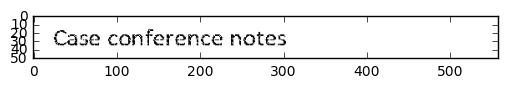

[[[580 842]]

 [[584 839]]

 [[586 841]]

 [[605 841]]

 [[607 844]]

 [[607 861]]

 [[602 864]]

 [[581 863]]]
black Count:  0
ratio_black:  0.266025641025641


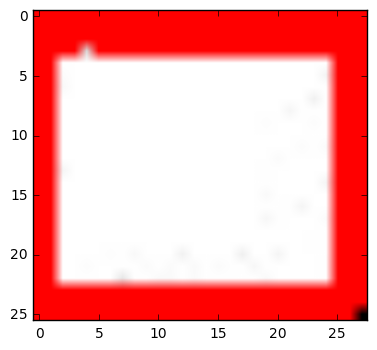

[[[ 14 838]]

 [[ 14 866]]

 [[ 46 866]]

 [[ 46 838]]]
black Count:  46
ratio_black:  0.26161616161616164


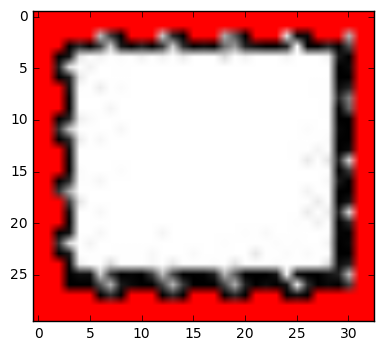

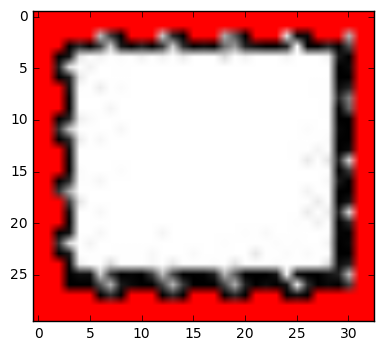

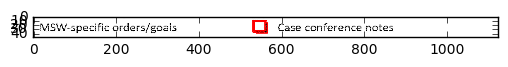

[[[ 43 842]]

 [[ 42 863]]

 [[ 20 864]]

 [[ 17 862]]

 [[ 16 843]]

 [[ 18 841]]

 [[ 31 841]]

 [[ 32 839]]

 [[ 34 841]]

 [[ 39 840]]]
black Count:  0
ratio_black:  0.26556776556776557


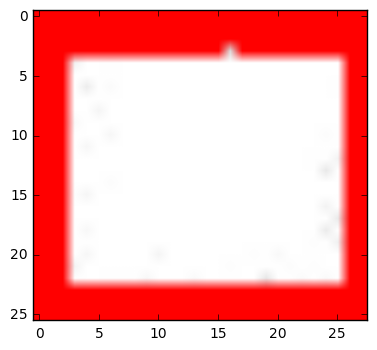

[[[577 803]]

 [[577 831]]

 [[612 830]]

 [[612 806]]

 [[610 806]]

 [[609 803]]]
black Count:  50
ratio_black:  0.26309067688378035


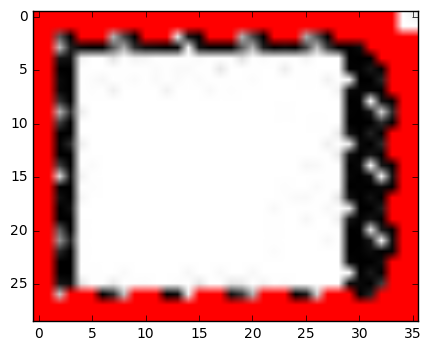

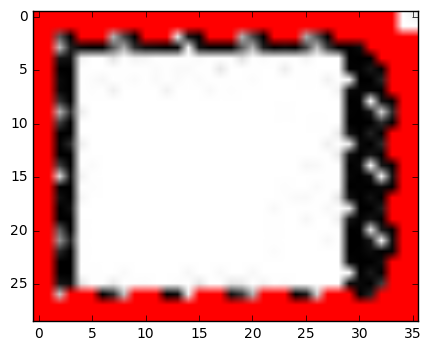

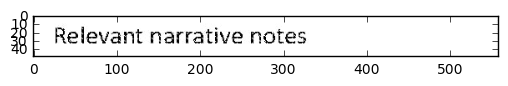

[[[580 807]]

 [[585 805]]

 [[605 806]]

 [[607 809]]

 [[607 827]]

 [[603 830]]

 [[581 829]]]
black Count:  0
ratio_black:  0.2454212454212454


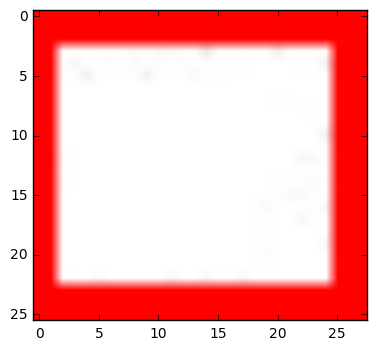

[[[ 14 803]]

 [[ 14 831]]

 [[ 46 831]]

 [[ 46 803]]]
black Count:  28
ratio_black:  0.24242424242424243


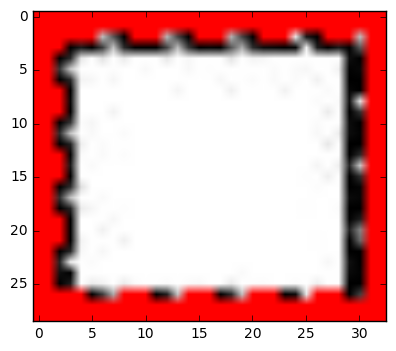

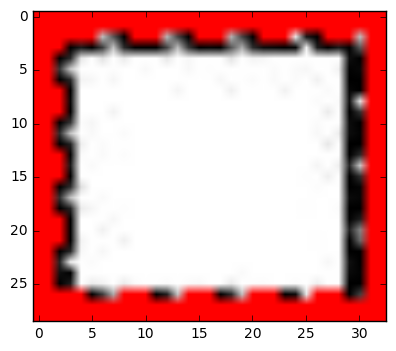

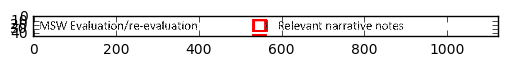

[[[ 16 808]]

 [[ 21 805]]

 [[ 42 806]]

 [[ 43 828]]

 [[ 39 830]]

 [[ 18 829]]

 [[ 16 826]]]
black Count:  0
ratio_black:  0.2454212454212454


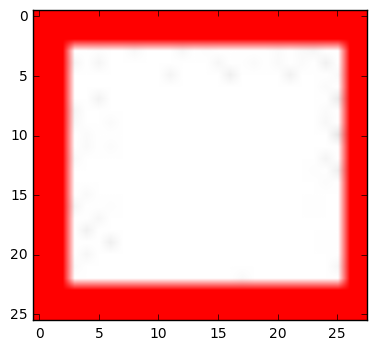

[[[577 768]]

 [[577 796]]

 [[609 796]]

 [[608 795]]

 [[612 793]]

 [[611 769]]]
black Count:  61
ratio_black:  0.27298850574712646


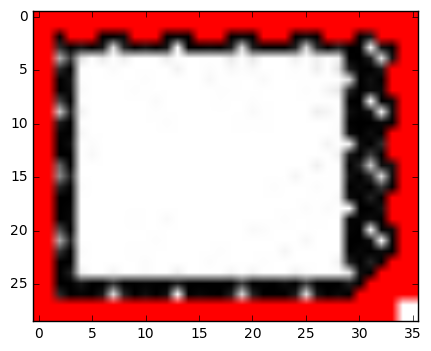

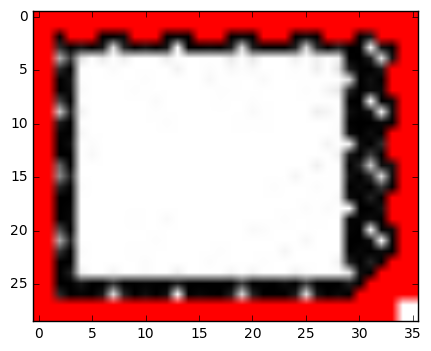

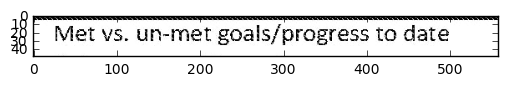

[[[580 772]]

 [[584 770]]

 [[605 771]]

 [[607 774]]

 [[607 792]]

 [[581 793]]]
black Count:  0
ratio_black:  0.23363095238095238


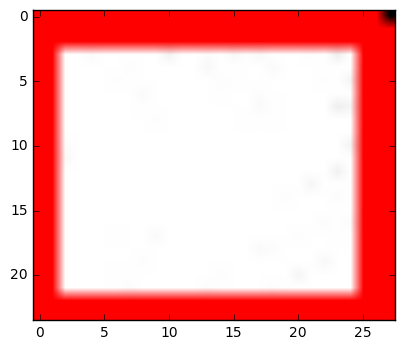

[[[ 14 768]]

 [[ 14 796]]

 [[ 46 796]]

 [[ 46 768]]]
black Count:  46
ratio_black:  0.26053639846743293


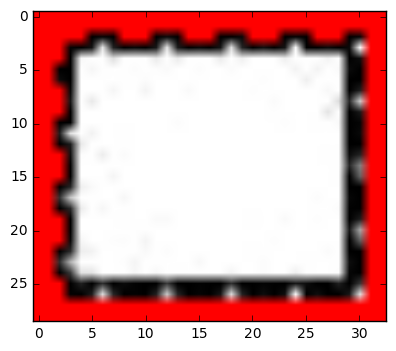

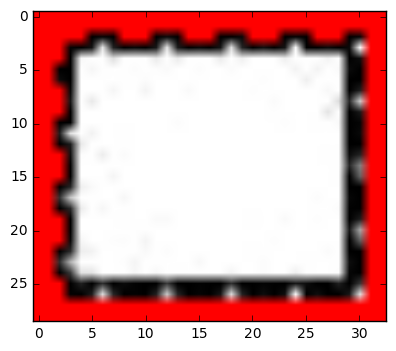

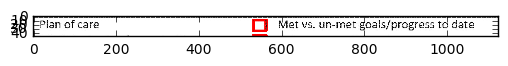

[[[ 17 772]]

 [[ 20 770]]

 [[ 42 771]]

 [[ 43 792]]

 [[ 18 793]]

 [[ 16 791]]]
black Count:  0
ratio_black:  0.23313492063492064


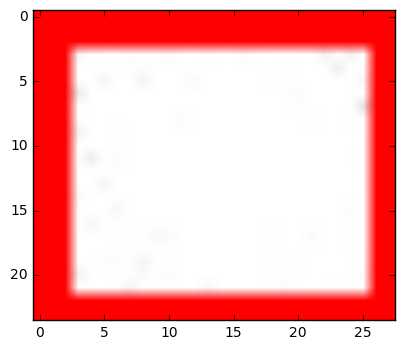

[[[ 14 723]]

 [[ 14 751]]

 [[ 19 753]]

 [[ 17 752]]

 [[ 18 750]]

 [[ 21 753]]

 [[ 25 753]]

 [[ 23 752]]

 [[ 24 750]]

 [[ 27 753]]

 [[ 31 753]]

 [[ 29 752]]

 [[ 30 750]]

 [[ 33 753]]

 [[ 37 753]]

 [[ 35 752]]

 [[ 36 750]]

 [[ 39 753]]

 [[ 46 751]]

 [[ 46 723]]]
black Count:  41
ratio_black:  0.2802215705441512


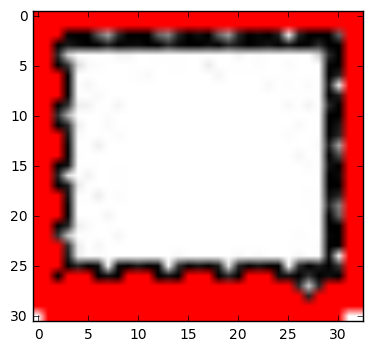

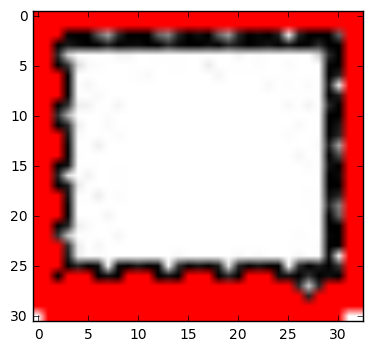

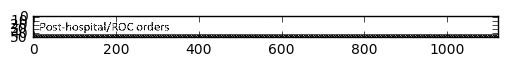

[[[ 16 727]]

 [[ 42 726]]

 [[ 43 747]]

 [[ 39 749]]

 [[ 18 748]]

 [[ 16 745]]]
black Count:  1
ratio_black:  0.23363095238095238


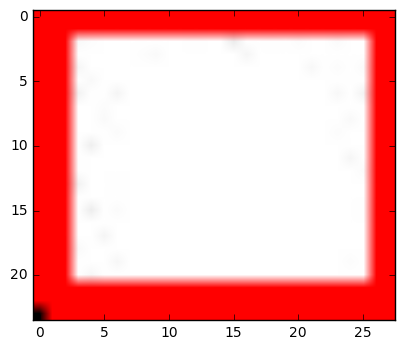

[[[577 685]]

 [[577 713]]

 [[608 712]]

 [[610 715]]

 [[607 717]]

 [[612 716]]

 [[612 691]]

 [[608 690]]

 [[608 685]]]
black Count:  53
ratio_black:  0.2676767676767677


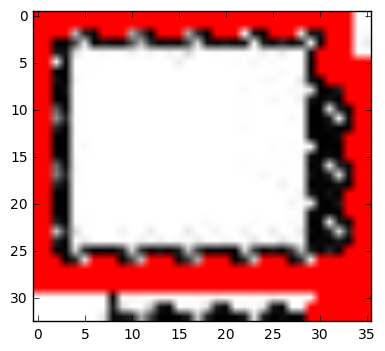

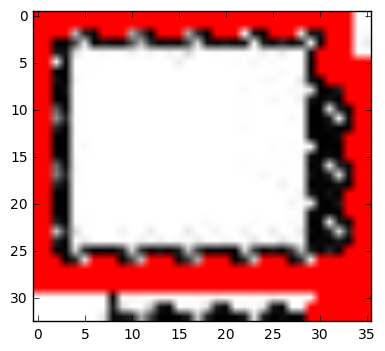

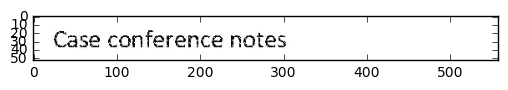

[[[580 689]]

 [[582 687]]

 [[605 688]]

 [[607 693]]

 [[606 710]]

 [[581 711]]]
black Count:  0
ratio_black:  0.24952380952380954


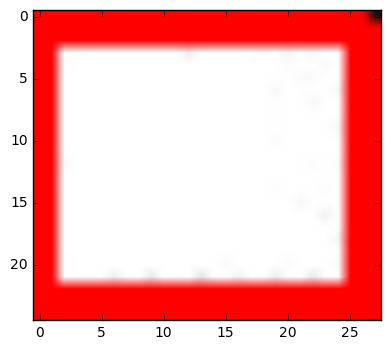

[[[ 14 685]]

 [[ 14 712]]

 [[ 18 716]]

 [[ 22 716]]

 [[ 17 715]]

 [[ 20 712]]

 [[ 42 713]]

 [[ 42 716]]

 [[ 44 712]]

 [[ 46 713]]

 [[ 46 685]]]
black Count:  44
ratio_black:  0.2657828282828283


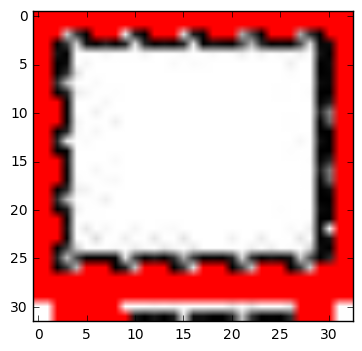

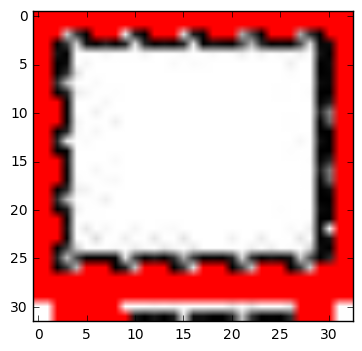

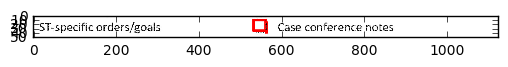

[[[ 17 688]]

 [[ 42 687]]

 [[ 43 709]]

 [[ 41 711]]

 [[ 18 710]]

 [[ 16 704]]]
black Count:  1
ratio_black:  0.2509523809523809


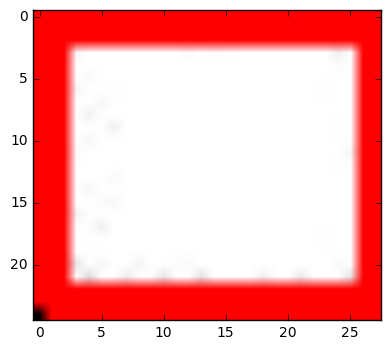

[[[577 650]]

 [[577 677]]

 [[590 679]]

 [[589 677]]

 [[592 677]]

 [[592 679]]

 [[596 679]]

 [[595 677]]

 [[608 679]]

 [[606 678]]

 [[609 677]]

 [[612 679]]

 [[612 655]]

 [[609 654]]

 [[608 650]]]
black Count:  60
ratio_black:  0.2759259259259259


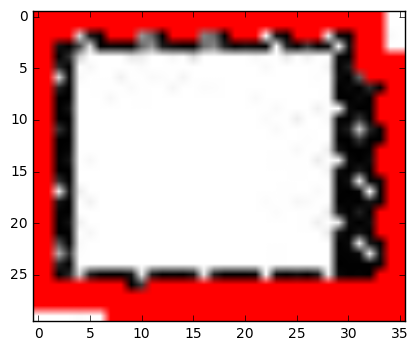

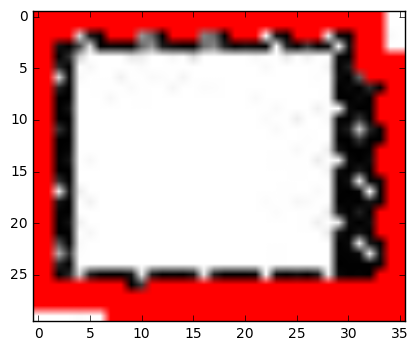

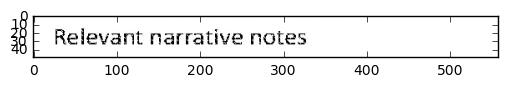

[[[580 654]]

 [[582 652]]

 [[586 653]]

 [[587 651]]

 [[589 653]]

 [[592 653]]

 [[593 651]]

 [[595 653]]

 [[605 653]]

 [[607 659]]

 [[606 675]]

 [[581 676]]]
black Count:  0
ratio_black:  0.2641941391941392


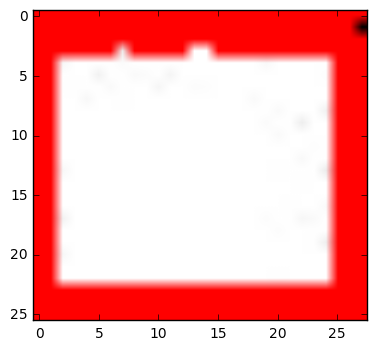

[[[ 14 650]]

 [[ 14 677]]

 [[ 20 679]]

 [[ 19 677]]

 [[ 22 677]]

 [[ 22 679]]

 [[ 26 679]]

 [[ 25 677]]

 [[ 28 677]]

 [[ 28 679]]

 [[ 32 679]]

 [[ 31 677]]

 [[ 34 677]]

 [[ 34 679]]

 [[ 46 677]]

 [[ 46 650]]]
black Count:  28
ratio_black:  0.26666666666666666


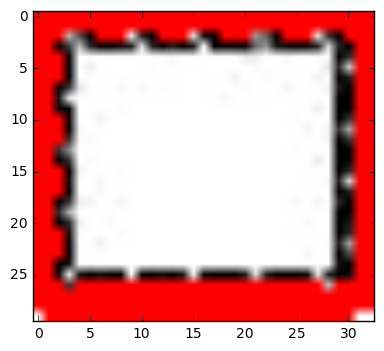

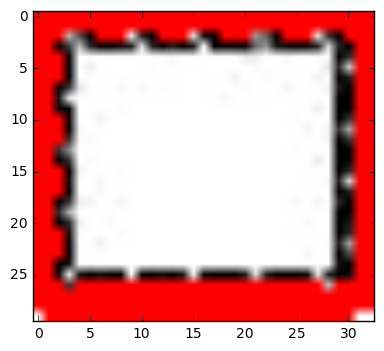

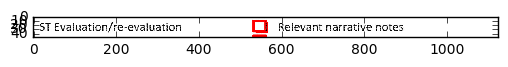

[[[ 43 653]]

 [[ 43 674]]

 [[ 41 676]]

 [[ 23 676]]

 [[ 17 674]]

 [[ 16 658]]

 [[ 18 652]]

 [[ 34 653]]

 [[ 35 651]]

 [[ 37 653]]]
black Count:  0
ratio_black:  0.26556776556776557


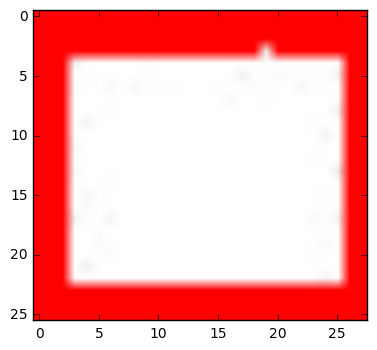

[[[577 614]]

 [[577 642]]

 [[609 642]]

 [[612 640]]

 [[612 617]]

 [[611 618]]

 [[609 614]]]
black Count:  60
ratio_black:  0.26309067688378035


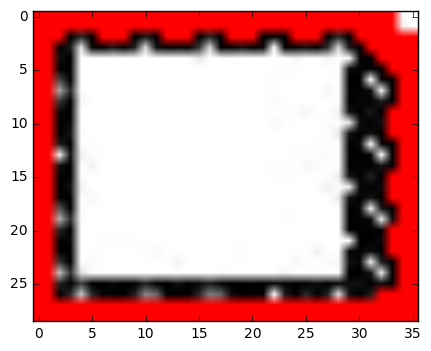

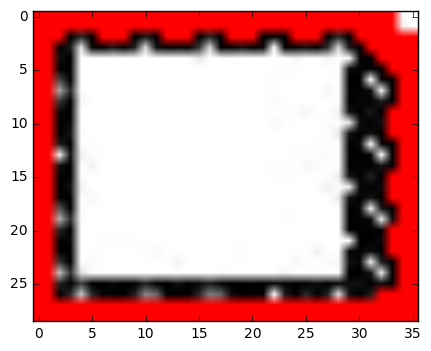

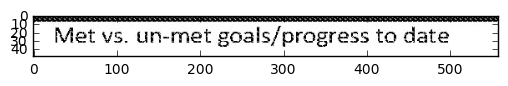

[[[580 617]]

 [[605 616]]

 [[607 618]]

 [[606 638]]

 [[581 639]]]
black Count:  0
ratio_black:  0.23313492063492064


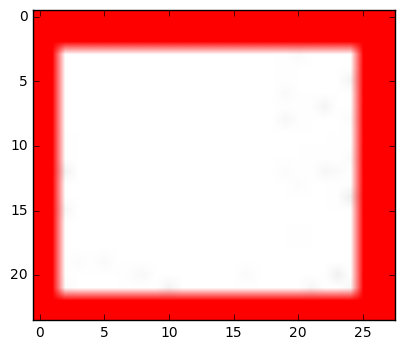

[[[ 14 615]]

 [[ 14 642]]

 [[ 46 642]]

 [[ 46 614]]]
black Count:  48
ratio_black:  0.25914315569487983


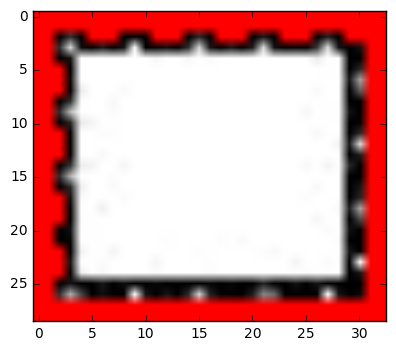

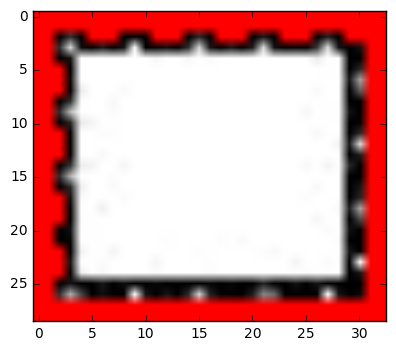

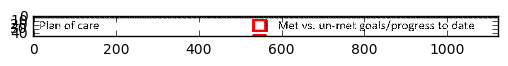

[[[ 17 618]]

 [[ 23 616]]

 [[ 24 617]]

 [[ 41 616]]

 [[ 43 618]]

 [[ 43 638]]

 [[ 18 639]]

 [[ 16 629]]]
black Count:  1
ratio_black:  0.23363095238095238


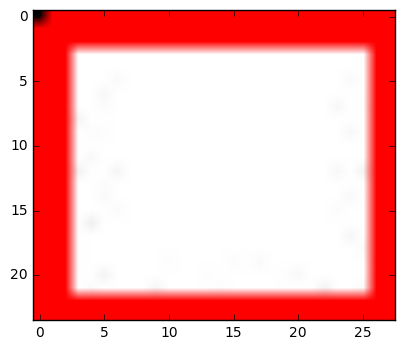

[[[ 14 569]]

 [[ 14 596]]

 [[ 17 596]]

 [[ 19 600]]

 [[ 22 600]]

 [[ 19 599]]

 [[ 20 596]]

 [[ 46 596]]

 [[ 46 568]]]
black Count:  58
ratio_black:  0.2699724517906336


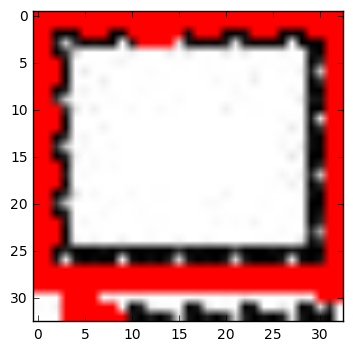

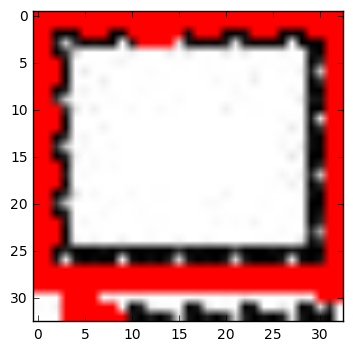

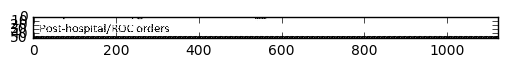

[[[ 17 572]]

 [[ 23 570]]

 [[ 24 571]]

 [[ 41 570]]

 [[ 43 572]]

 [[ 43 592]]

 [[ 18 593]]

 [[ 16 588]]]
black Count:  1
ratio_black:  0.23214285714285715


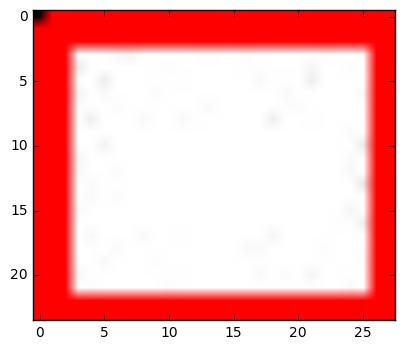

[[[577 533]]

 [[577 561]]

 [[582 561]]

 [[583 564]]

 [[609 564]]

 [[609 535]]

 [[607 533]]

 [[580 533]]

 [[579 535]]]
black Count:  57
ratio_black:  0.26609848484848486


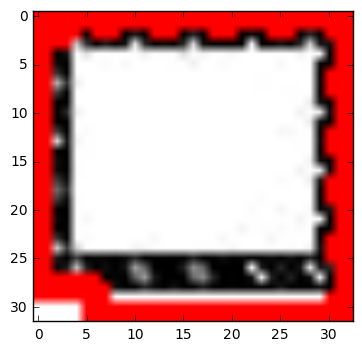

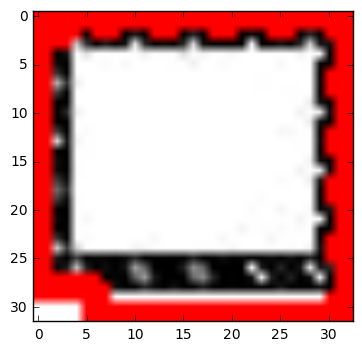

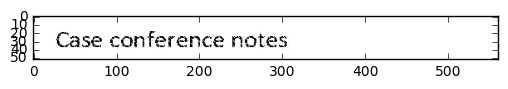

[[[580 536]]

 [[605 535]]

 [[607 537]]

 [[606 557]]

 [[581 558]]]
black Count:  0
ratio_black:  0.23313492063492064


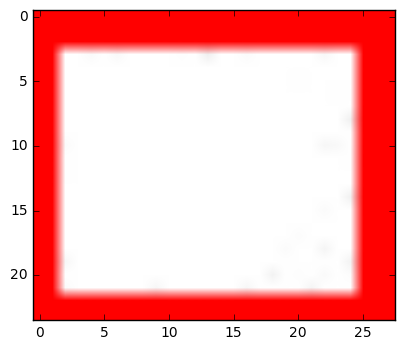

[[[ 14 534]]

 [[ 14 561]]

 [[ 17 563]]

 [[ 18 561]]

 [[ 42 561]]

 [[ 42 563]]

 [[ 46 561]]

 [[ 46 533]]]
black Count:  50
ratio_black:  0.27044639947865756


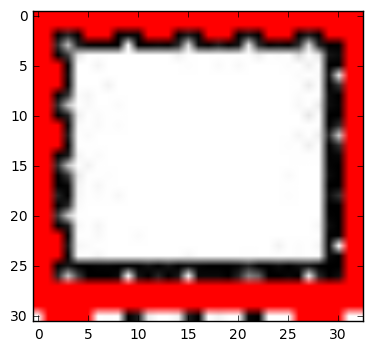

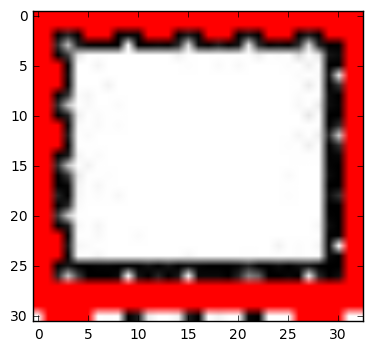

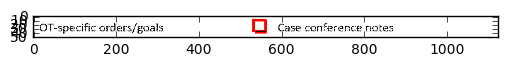

[[[ 17 537]]

 [[ 23 535]]

 [[ 24 536]]

 [[ 41 535]]

 [[ 43 537]]

 [[ 43 557]]

 [[ 18 558]]

 [[ 16 553]]]
black Count:  0
ratio_black:  0.23363095238095238


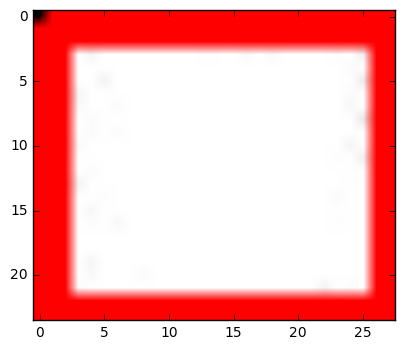

[[[577 496]]

 [[577 523]]

 [[582 523]]

 [[582 527]]

 [[584 523]]

 [[608 523]]

 [[609 527]]

 [[609 518]]

 [[607 517]]

 [[609 516]]

 [[607 511]]

 [[609 509]]

 [[607 505]]

 [[609 504]]

 [[609 496]]]
black Count:  31
ratio_black:  0.24968434343434343


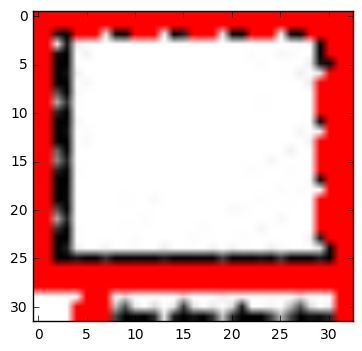

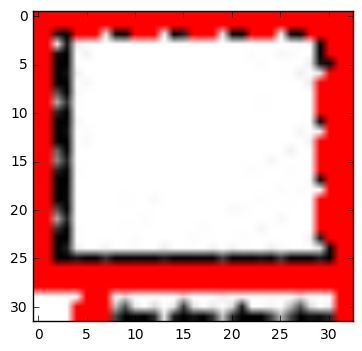

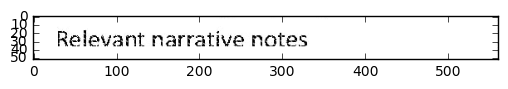

[[[580 499]]

 [[584 497]]

 [[605 498]]

 [[607 502]]

 [[607 520]]

 [[581 521]]]
black Count:  0
ratio_black:  0.22857142857142856


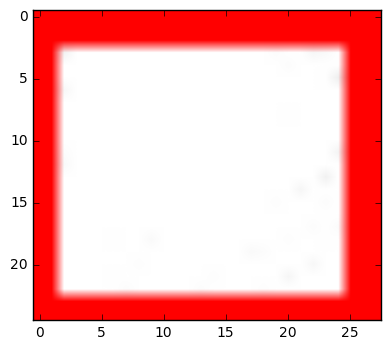

[[[ 14 496]]

 [[ 14 523]]

 [[ 18 523]]

 [[ 18 527]]

 [[ 20 523]]

 [[ 44 523]]

 [[ 45 527]]

 [[ 46 496]]]
black Count:  37
ratio_black:  0.2474747474747475


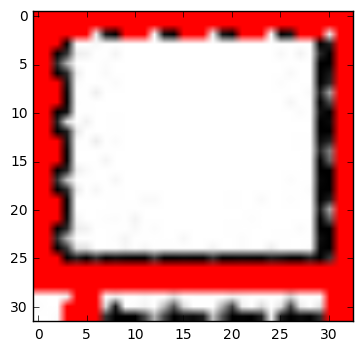

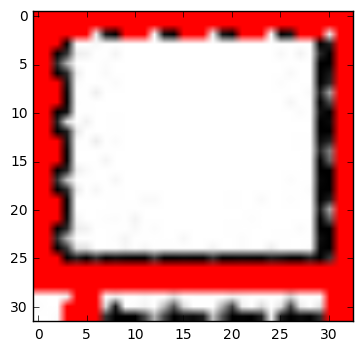

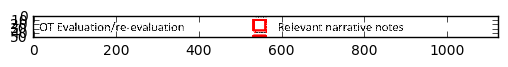

[[[ 17 499]]

 [[ 20 497]]

 [[ 42 498]]

 [[ 43 520]]

 [[ 18 521]]

 [[ 16 519]]]
black Count:  0
ratio_black:  0.22857142857142856


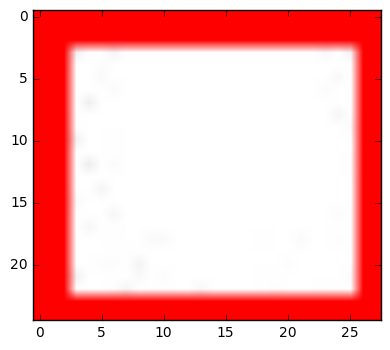

[[[577 420]]

 [[577 448]]

 [[609 448]]

 [[609 431]]

 [[607 430]]

 [[609 428]]

 [[609 420]]]
black Count:  51
ratio_black:  0.26436781609195403


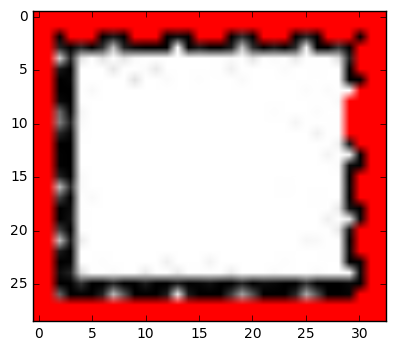

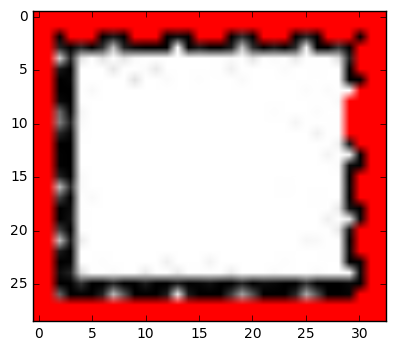

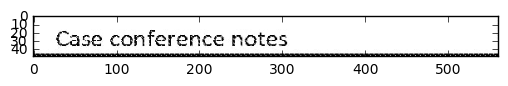

[[[580 424]]

 [[584 422]]

 [[605 423]]

 [[607 427]]

 [[607 444]]

 [[581 445]]]
black Count:  1
ratio_black:  0.23363095238095238


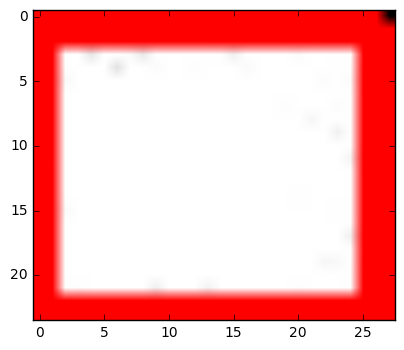

[[[ 14 420]]

 [[ 14 448]]

 [[ 46 448]]

 [[ 46 420]]]
black Count:  42
ratio_black:  0.2542668059909439


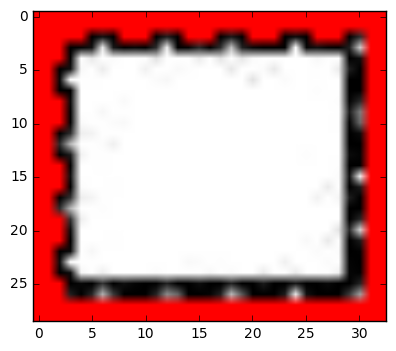

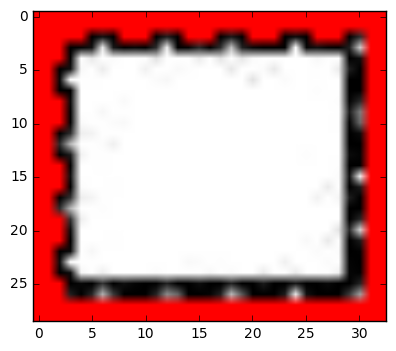

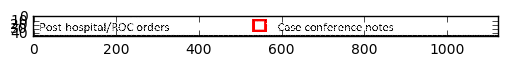

[[[ 17 424]]

 [[ 20 422]]

 [[ 42 423]]

 [[ 43 444]]

 [[ 18 445]]

 [[ 16 443]]]
black Count:  0
ratio_black:  0.23313492063492064


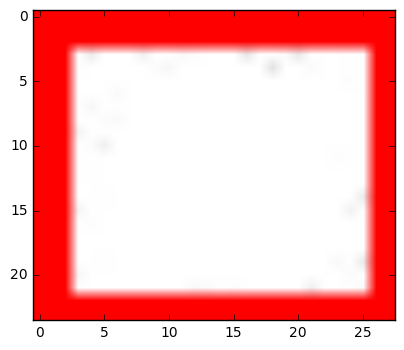

[[[577 385]]

 [[577 412]]

 [[609 411]]

 [[607 407]]

 [[609 405]]

 [[607 401]]

 [[609 400]]

 [[609 390]]

 [[607 389]]

 [[609 385]]]
black Count:  22
ratio_black:  0.24567099567099568


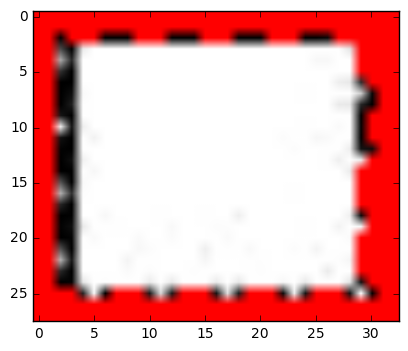

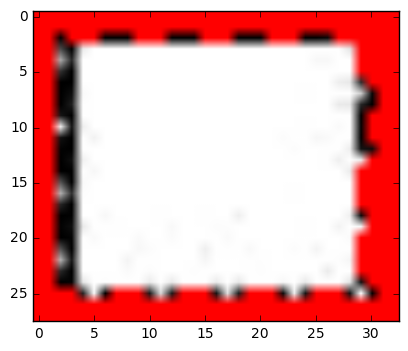

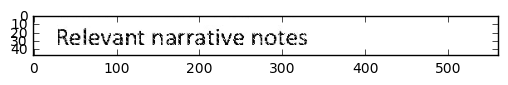

[[[580 388]]

 [[605 387]]

 [[607 392]]

 [[606 409]]

 [[600 411]]

 [[582 411]]

 [[580 409]]]
black Count:  0
ratio_black:  0.22857142857142856


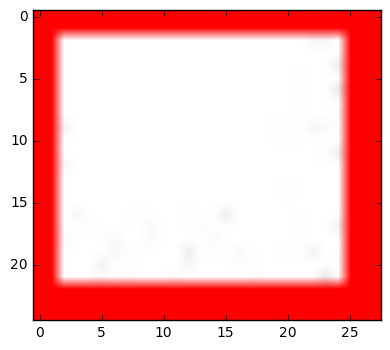

[[[ 14 385]]

 [[ 14 412]]

 [[ 46 412]]

 [[ 45 384]]

 [[ 41 386]]

 [[ 23 386]]

 [[ 19 384]]

 [[ 18 387]]]
black Count:  29
ratio_black:  0.25705329153605017


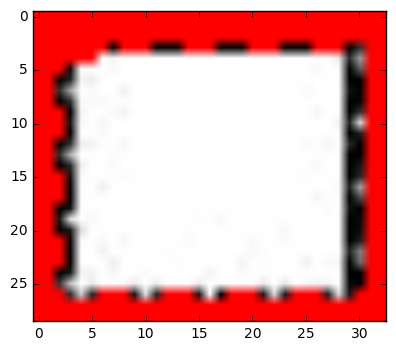

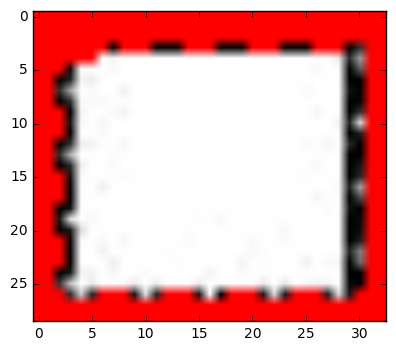

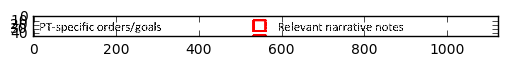

[[[ 17 388]]

 [[ 42 387]]

 [[ 43 410]]

 [[ 18 411]]

 [[ 16 409]]]
black Count:  0
ratio_black:  0.22857142857142856


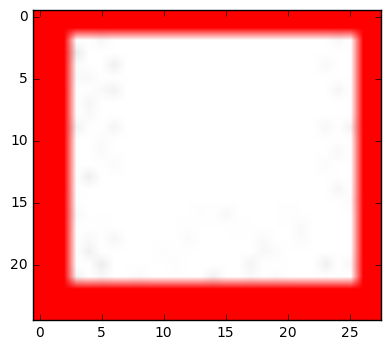

[[[577 350]]

 [[577 378]]

 [[609 377]]

 [[609 367]]

 [[607 366]]

 [[609 364]]

 [[607 359]]

 [[609 358]]

 [[609 350]]]
black Count:  45
ratio_black:  0.26227795193312436


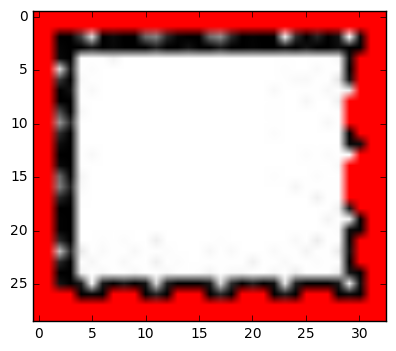

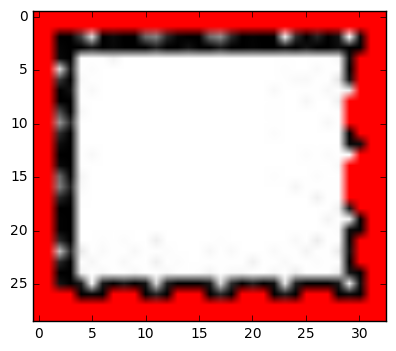

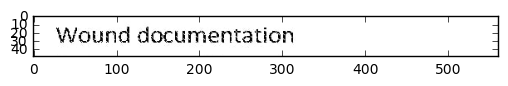

[[[580 354]]

 [[605 353]]

 [[607 357]]

 [[606 374]]

 [[600 376]]

 [[599 375]]

 [[582 376]]

 [[580 374]]]
black Count:  1
ratio_black:  0.23363095238095238


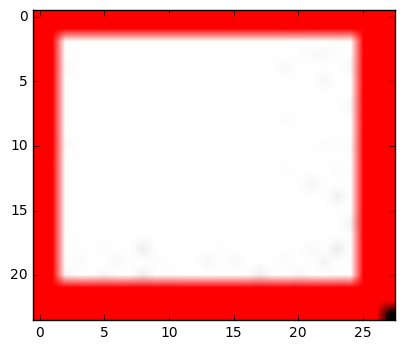

[[[ 14 350]]

 [[ 14 378]]

 [[ 46 378]]

 [[ 46 350]]]
black Count:  39
ratio_black:  0.2549634273772205


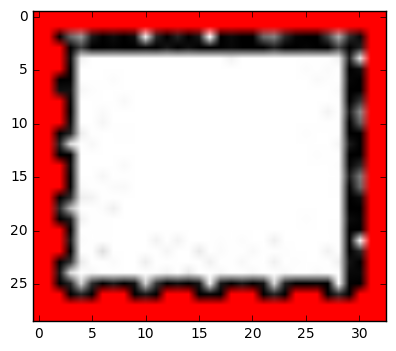

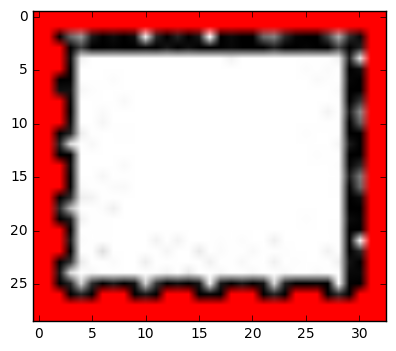

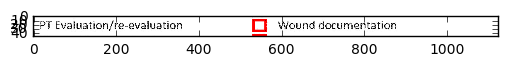

[[[ 17 354]]

 [[ 42 353]]

 [[ 43 375]]

 [[ 18 376]]

 [[ 16 374]]]
black Count:  0
ratio_black:  0.23313492063492064


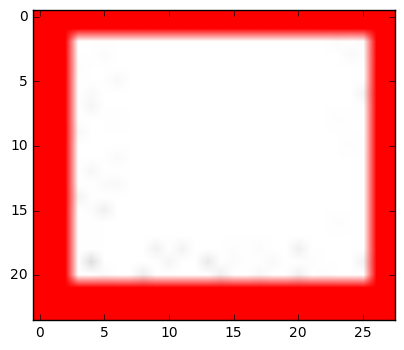

[[[577 315]]

 [[577 342]]

 [[609 342]]

 [[609 338]]

 [[607 337]]

 [[609 336]]

 [[609 327]]

 [[607 326]]

 [[609 325]]

 [[609 321]]

 [[607 320]]

 [[609 315]]]
black Count:  30
ratio_black:  0.24711399711399712


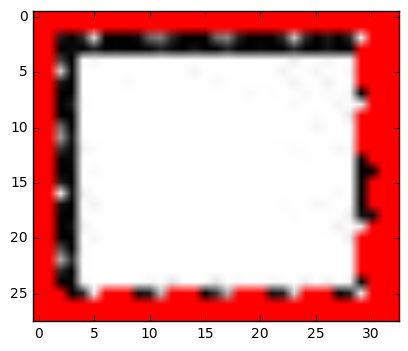

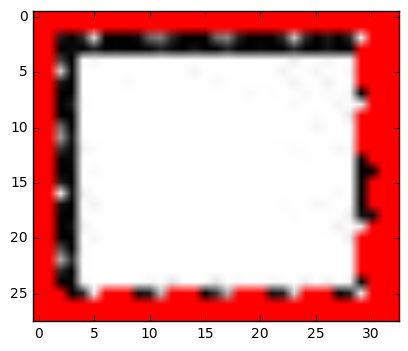

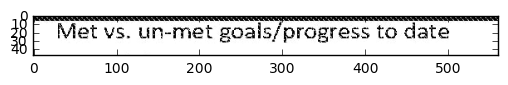

[[[580 319]]

 [[605 318]]

 [[607 323]]

 [[606 339]]

 [[600 341]]

 [[599 340]]

 [[582 341]]

 [[580 339]]]
black Count:  0
ratio_black:  0.23313492063492064


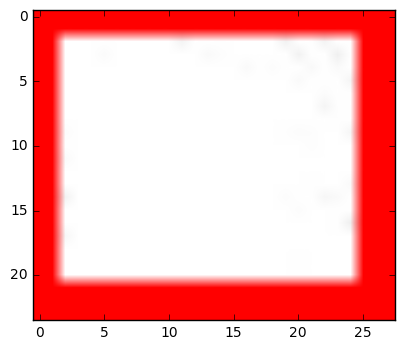

[[[ 14 315]]

 [[ 15 342]]

 [[ 46 342]]

 [[ 46 315]]]
black Count:  34
ratio_black:  0.2427849927849928


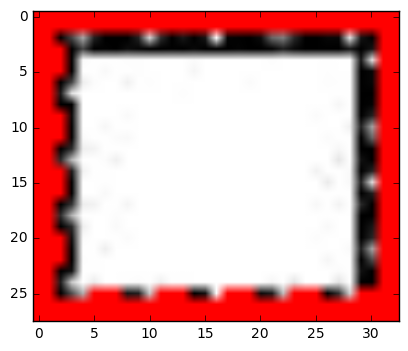

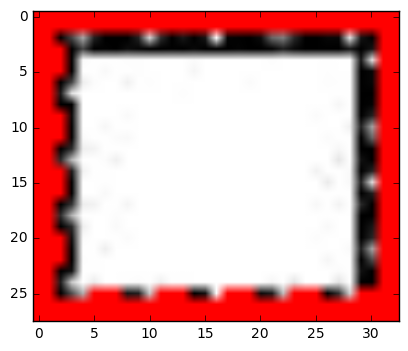

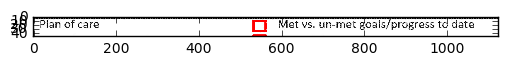

[[[ 17 319]]

 [[ 42 318]]

 [[ 43 340]]

 [[ 18 341]]

 [[ 16 339]]]
black Count:  0
ratio_black:  0.23313492063492064


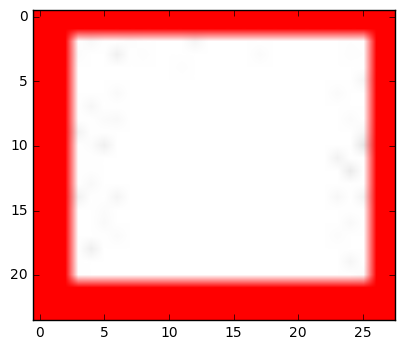

[[[ 14 273]]

 [[ 14 300]]

 [[ 46 300]]

 [[ 46 273]]

 [[ 45 274]]

 [[ 43 271]]

 [[ 17 271]]

 [[ 15 274]]]
black Count:  38
ratio_black:  0.2545454545454545


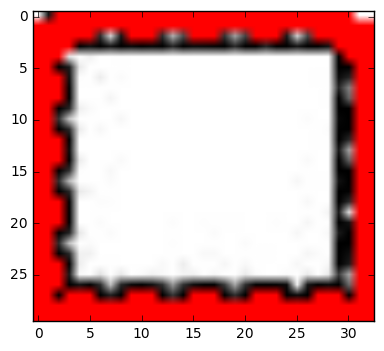

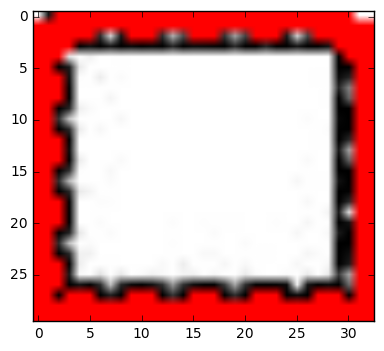

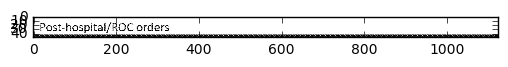

[[[ 16 275]]

 [[ 42 274]]

 [[ 43 296]]

 [[ 39 298]]

 [[ 18 297]]

 [[ 16 293]]]
black Count:  1
ratio_black:  0.22904761904761906


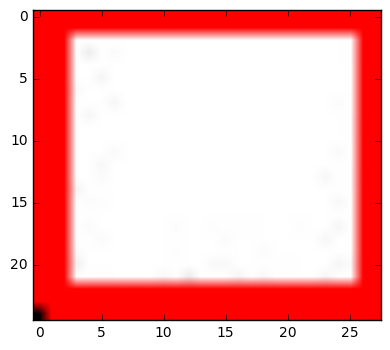

[[[577 235]]

 [[577 263]]

 [[609 263]]

 [[607 261]]

 [[609 260]]

 [[609 257]]

 [[607 256]]

 [[609 254]]

 [[609 240]]

 [[607 239]]

 [[609 235]]]
black Count:  52
ratio_black:  0.26541274817136884


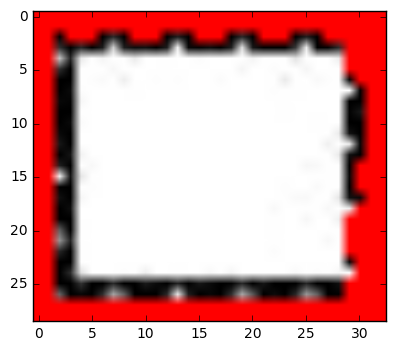

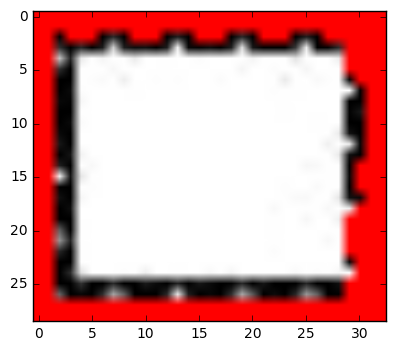

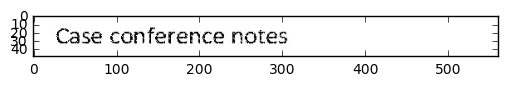

[[[580 239]]

 [[584 237]]

 [[605 238]]

 [[607 242]]

 [[607 259]]

 [[581 260]]]
black Count:  0
ratio_black:  0.23313492063492064


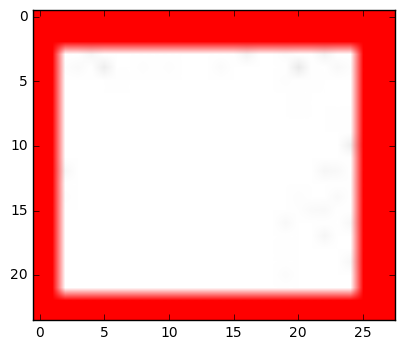

[[[ 14 235]]

 [[ 14 263]]

 [[ 46 263]]

 [[ 46 235]]]
black Count:  47
ratio_black:  0.265993265993266


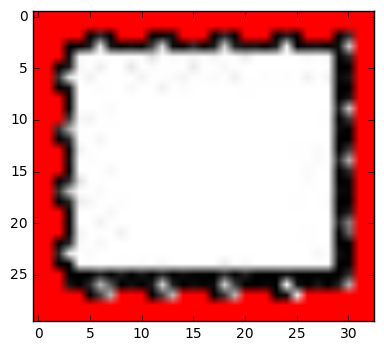

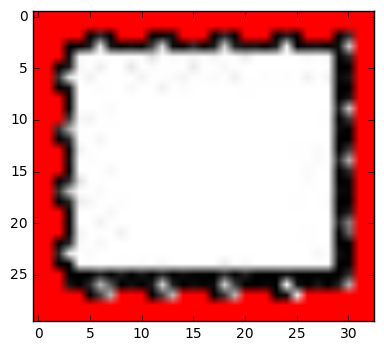

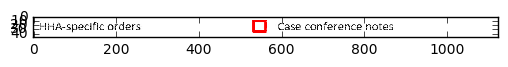

[[[ 17 239]]

 [[ 20 237]]

 [[ 42 238]]

 [[ 43 259]]

 [[ 18 260]]

 [[ 16 258]]]
black Count:  0
ratio_black:  0.23313492063492064


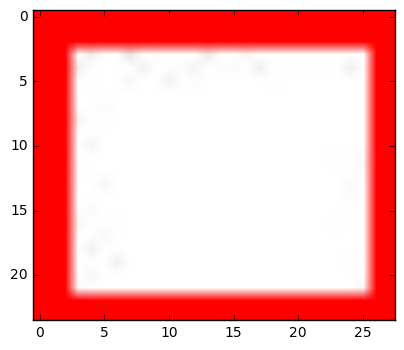

[[[577 158]]

 [[577 185]]

 [[609 185]]

 [[609 176]]

 [[607 175]]

 [[609 173]]

 [[607 169]]

 [[609 168]]

 [[608 158]]]
black Count:  28
ratio_black:  0.25322187391152906


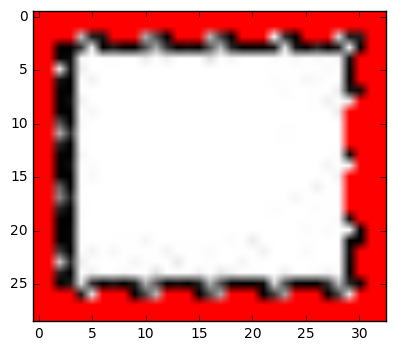

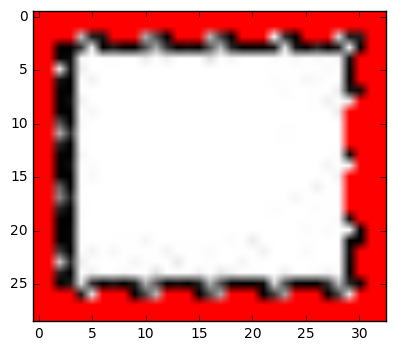

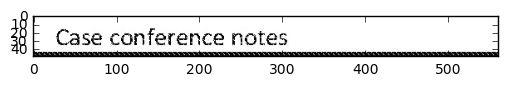

[[[580 162]]

 [[582 160]]

 [[605 161]]

 [[607 166]]

 [[606 183]]

 [[581 184]]]
black Count:  0
ratio_black:  0.24952380952380954


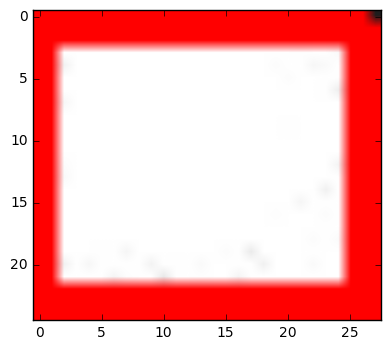

[[[ 14 158]]

 [[ 14 185]]

 [[ 46 185]]

 [[ 46 158]]]
black Count:  34
ratio_black:  0.25740160222918845


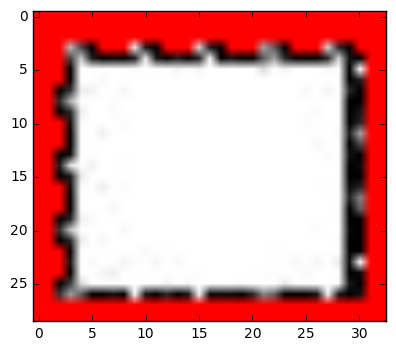

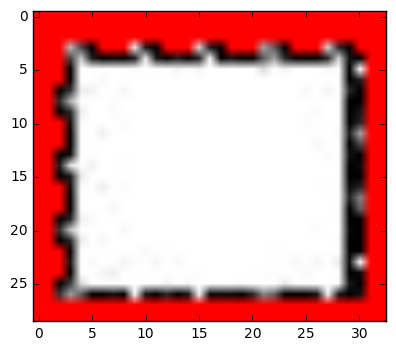

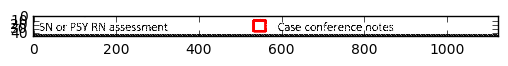

[[[ 17 161]]

 [[ 42 160]]

 [[ 43 182]]

 [[ 41 184]]

 [[ 36 183]]

 [[ 36 185]]

 [[ 34 183]]

 [[ 18 183]]

 [[ 16 177]]]
black Count:  0
ratio_black:  0.26556776556776557


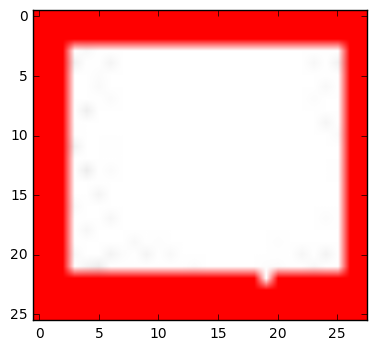

[[[577 122]]

 [[577 150]]

 [[609 150]]

 [[609 130]]

 [[607 129]]

 [[608 127]]

 [[609 128]]

 [[609 122]]]
black Count:  47
ratio_black:  0.249390456287008


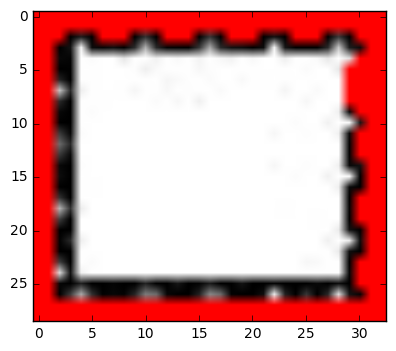

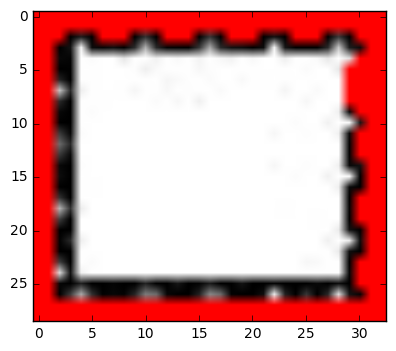

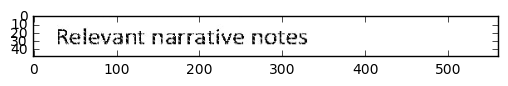

[[[580 125]]

 [[605 124]]

 [[607 126]]

 [[606 146]]

 [[581 147]]]
black Count:  0
ratio_black:  0.23313492063492064


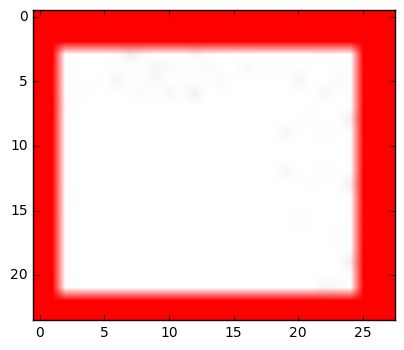

[[[ 14 123]]

 [[ 14 150]]

 [[ 46 150]]

 [[ 45 120]]

 [[ 43 120]]

 [[ 45 121]]

 [[ 44 123]]

 [[ 20 123]]

 [[ 20 120]]]
black Count:  59
ratio_black:  0.2678396871945259


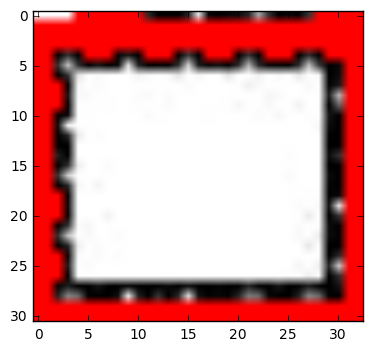

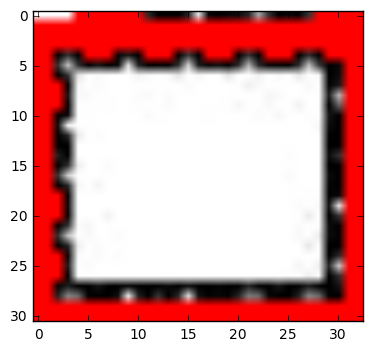

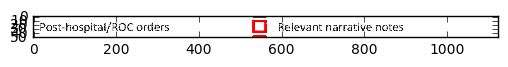

[[[ 17 126]]

 [[ 23 124]]

 [[ 24 125]]

 [[ 41 124]]

 [[ 43 126]]

 [[ 43 146]]

 [[ 18 147]]

 [[ 16 142]]]
black Count:  1
ratio_black:  0.23363095238095238


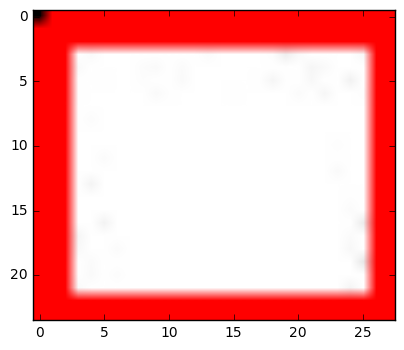

[[[577  87]]

 [[577 115]]

 [[609 115]]

 [[609 112]]

 [[607 111]]

 [[609 109]]

 [[609  95]]

 [[607  94]]

 [[609  92]]

 [[609  87]]]
black Count:  54
ratio_black:  0.264983164983165


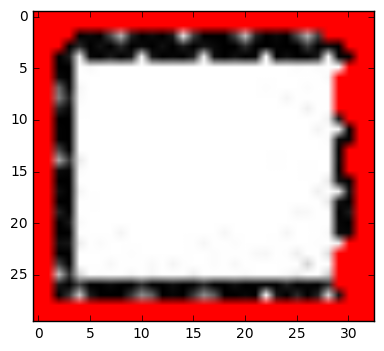

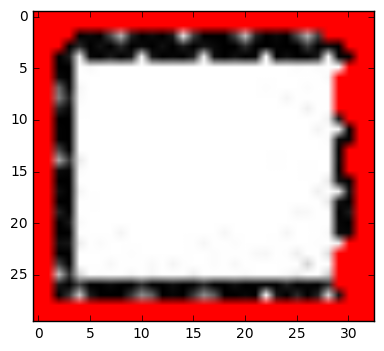

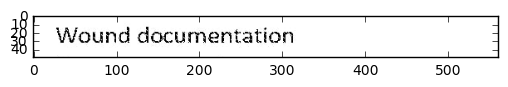

[[[580  90]]

 [[605  89]]

 [[607  91]]

 [[606 111]]

 [[581 112]]]
black Count:  0
ratio_black:  0.23313492063492064


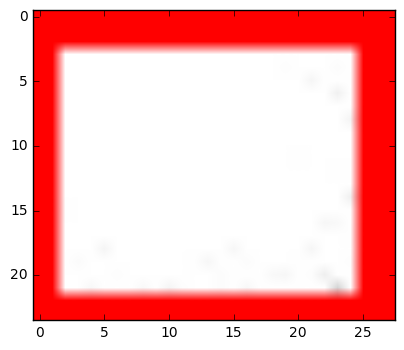

[[[ 18  83]]

 [[ 19  86]]

 [[ 14  88]]

 [[ 14 115]]

 [[ 46 115]]

 [[ 45  83]]]
black Count:  59
ratio_black:  0.2509947964493419


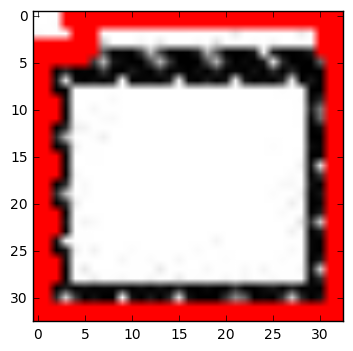

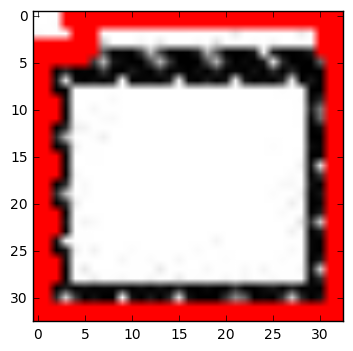

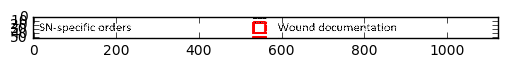

[[[ 17  91]]

 [[ 23  89]]

 [[ 24  90]]

 [[ 41  89]]

 [[ 43  91]]

 [[ 43 111]]

 [[ 18 112]]

 [[ 16 107]]]
black Count:  0
ratio_black:  0.23363095238095238


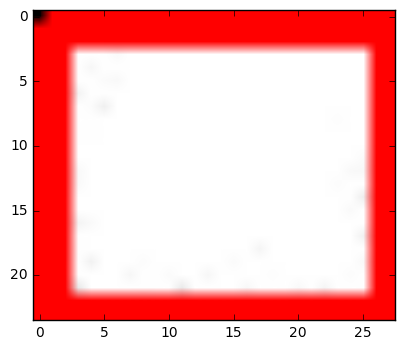

[[[577  51]]

 [[577  79]]

 [[609  79]]

 [[607  77]]

 [[609  76]]

 [[609  72]]

 [[607  71]]

 [[609  69]]

 [[607  65]]

 [[609  64]]

 [[609  54]]

 [[607  52]]

 [[609  51]]]
black Count:  29
ratio_black:  0.24312086381051898


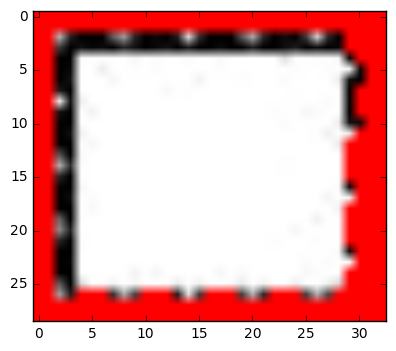

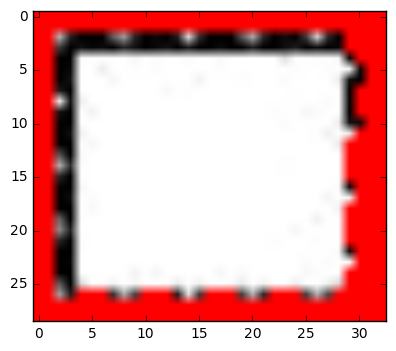

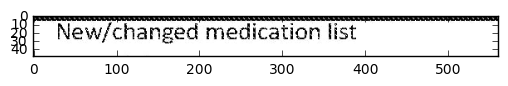

[[[580  55]]

 [[605  54]]

 [[607  56]]

 [[606  76]]

 [[603  78]]

 [[581  77]]]
black Count:  0
ratio_black:  0.22857142857142856


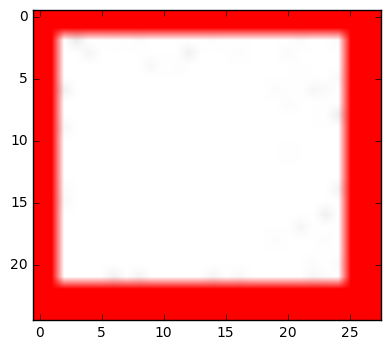

[[[14 51]]

 [[14 79]]

 [[46 79]]

 [[45 50]]]
black Count:  30
ratio_black:  0.24612794612794614


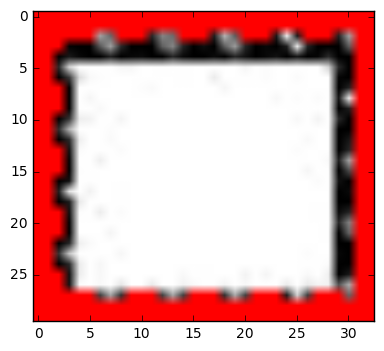

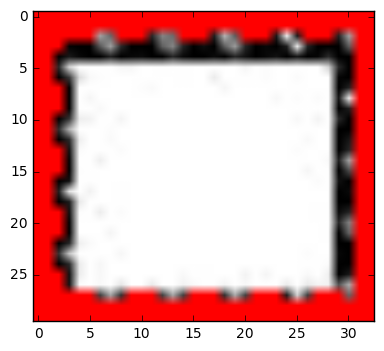

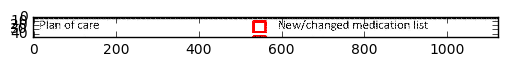

[[[16 55]]

 [[42 54]]

 [[43 76]]

 [[39 78]]

 [[18 77]]

 [[16 73]]]
black Count:  0
ratio_black:  0.22857142857142856


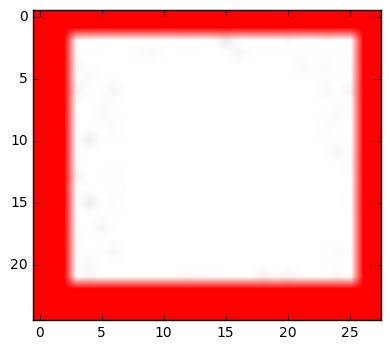

[[[580 463]]

 [[582 461]]

 [[605 462]]

 [[607 473]]

 [[606 484]]

 [[581 485]]]
black Count:  0
ratio_black:  0.24952380952380954


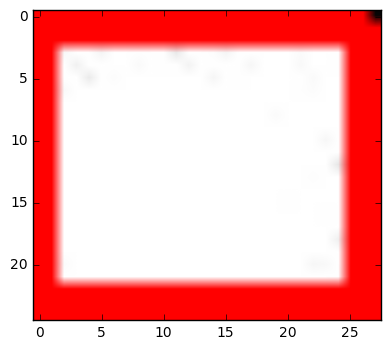

[[[ 17 462]]

 [[ 42 461]]

 [[ 43 483]]

 [[ 41 485]]

 [[ 18 484]]

 [[ 16 478]]]
black Count:  1
ratio_black:  0.2509523809523809


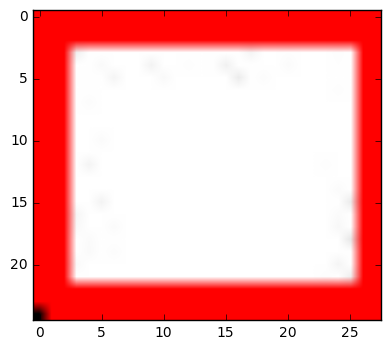

[[[580 202]]

 [[582 200]]

 [[605 201]]

 [[607 207]]

 [[606 223]]

 [[581 224]]]
black Count:  0
ratio_black:  0.24952380952380954


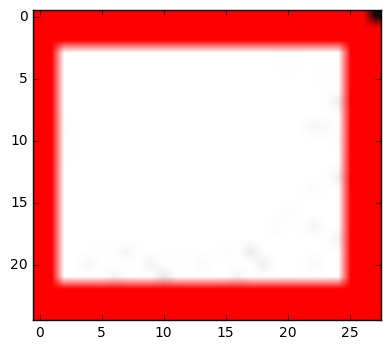

[[[ 17 201]]

 [[ 42 200]]

 [[ 43 222]]

 [[ 41 224]]

 [[ 18 223]]

 [[ 16 212]]]
black Count:  1
ratio_black:  0.2509523809523809


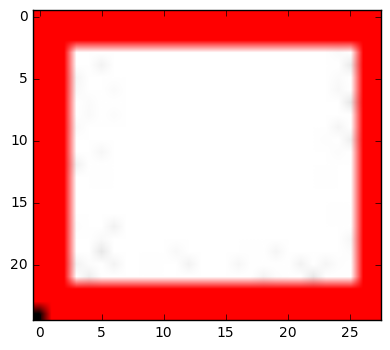

In [51]:
import cv2
import numpy as np

def angle_cos(p0, p1, p2):
    d1, d2 = (p0-p1).astype('float'), (p2-p1).astype('float')
    return abs( np.dot(d1, d2) / np.sqrt( np.dot(d1, d1)*np.dot(d2, d2) ) )


#img = cv2.imread(r'/mnt/d/checkboxes.jpg')
img = cv2.imread(r'/mnt/c/Users/yamshee.fatima/Downloads/image/sample3-a.png')
print(img.size)
print(img.shape)
#img = cv2.resize(img  , (2272*2 , 344*2))
plt.imshow(img)
plt.show()
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, threshold = cv2.threshold(gray,100,255,cv2.THRESH_BINARY_INV)
contours, hierarchy = cv2.findContours(threshold,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
list1 = []

for i in range(0, len(contours)):
    cnt = contours[i]
    epsilon = 0.1*cv2.arcLength(cnt,True)
    approx = cv2.approxPolyDP(cnt,epsilon,True)
    size = cv2.contourArea(approx)
    
    extLeft = tuple(cnt[cnt[:, :, 0].argmin()][0])
    extRight = tuple(cnt[cnt[:, :, 0].argmax()][0])
    distance = np.sqrt((extLeft[0] - extRight[0])**2 + (extLeft[1] - extRight[1])**2)
    
    if 1000 > size > 320:
                approx = cv2.approxPolyDP(cnt,0.01*cv2.arcLength(cnt,True),True)
                print(approx)
                cv2.drawContours(img,contours,i,255,2)    

                # extract the checkbox image and calculate the ratio of black pixels in this region
                x,y,w,h = cv2.boundingRect(cnt)
                checkbox_img = img[y:y+h, x:x+w]

                cv2.imwrite("detected-boxes.jpg", checkbox_img)
                image=cv2.imread("detected-boxes.jpg",0)
                # get all non black Pixels
                cntNotBlack = cv2.countNonZero(image)

                # get pixel count of image
                height, width = image.shape
                cntPixels = height*width

                # compute all black pixels
                cntBlack = cntPixels - cntNotBlack

                ratio_black = np.sum(checkbox_img == 0) / checkbox_img.size
                print('black Count: ',cntBlack)
                print('ratio_black: ',ratio_black)
                plt.imshow(checkbox_img)
                plt.show()
                if cntBlack>12:
                    #checkbox is marked
                    plt.imshow(checkbox_img)
                    plt.show()

                    #do the extraction of the text
                    checkbox_img_text = img[y-10:y+h+10, x+w:img.shape[1]]
                    plt.imshow(checkbox_img_text)
                    plt.show()


    elif 16 < distance < 17 and size > 150:
                x,y,w,h = cv2.boundingRect(cnt)
                print(x,y,w,h)
                list1.append(cnt)

for i in list1:        
            cv2.drawContours(img, [i], -1, (255,255,255), -1)

